<a href="https://colab.research.google.com/github/bitprj/DigitalHistory/blob/Shayan/Week9-Analyzing-Freedom-on-the-Move/Week9-Analyzing-Freedom-on-the-Move.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/ShayanRiyaz/DigitalHistory/blob/Shayan/Week5-Lab-Visualizing-the-Translatlantic-Slave-Trade/assets/icons/bitproject.png?raw=1" width="200" align="left"> 
<img src="https://github.com/ShayanRiyaz/DigitalHistory/blob/Shayan/Week5-Lab-Visualizing-the-Translatlantic-Slave-Trade/assets/icons/data-science.jpg?raw=1" width="300" align="right">

# <div align="center">Freedom on the Move</div>

# Recap
- Throughout this curriculum we have worked towards learning and implementing several methods of data analysis. 

Some of these are:
- Using Python and `pandas` to load dataframes.
- Cleaning and organizing our dataframes to make them easier to utilize.
- Finding basic statistics of the dataframe.
  - `mean`, `median`, `quartiles`, etc.
- Using `matplotlib`, `pandas` and `seaborn` for simple to advanced visualizations.


By this time, you should have an understanding of how to implement the following:
- Loading Dataframes, modifying columns (for e.g adding a new column).
- Modifying `NaN` values in our dataset .
- Using `df.plot` to plot basic plots such as:
    - Histograms - `df.plot(x,kind='hist')`
    - Bar - `df.plot(x,ykind='bar')`
    - Line - `df.plot(y)`
    - Scatter plots - `df.plot(x,y,kind='scatter')`

Using Seaborn to plot better and more intuitive visuals.
- Using `sns.relplot` to plot numerical plots.
    - Adding a 3rd parameter `hue`.
    - Adding a 4th parameter `size`.
- Using `sns.catplot` to plot categorical data.
    - Understanding and visualizing Box plots.



# About the Dataset





### Freedom on the Move
<p align="center">
<img src="https://freedomonthemove.org/images/freedom.png" width="200"> 
</p>


### Facts about the dataset

- Freedom on the Move is a database of fugitives from North American slavery.
- They are compiling thousands of stories of resistance that have never been accessible in one place.

- Research driven by us.
- A database full of possibilities.


You can read more about the dataset [here](https://freedomonthemove.org/).

# Practicum and Methodology


Congratulations, you have made it to the 2nd practicum of this course. In this practicum we will be using some of the important methods we have learned in the past few weeks. These methods have taught us how to clean and organize our datasets into a more consice and structured manner (replacing null values, adding new columns etc). We will also be visualizing the freedom on the move dataset after we have organized it according to our needs.

One thing that you should know about these datasets is, that when we have large quantities of `Null` values one drawback is that these are harder to work with and most of the times the outcome is not clear until we have completely analysed and restructured the datasets. For this practicum we have taken a beginner friendly *cover all tracks* approach to produce a useful dataset and then use it to do some exploratory data analysis. We recommend you try to work more with this dataset in the future and go beyond us in analyzing it.

We have divided our approach into **2** parts:

- The first part focuses on getting started with our dataset, cleaning and organizing it.
- The second part involves visualizations usint `seaborn` and `pandas`.


# Grading

This exercise has a total of 28 questions. Every question has 1 point. Some questions might have multiple parts but the weight of the question is the same.

In order to work on the questions in this Practicum and submit them for grading, you'll need to run the code block below. It will ask for your student ID number and then create a folder that will house your answers for each question. At the very end of the notebook, there is a code section that will download this folder as a zip file to your computer. This zip file will be your final submission.

In [ ]:
import os
import shutil

!rm -rf sample_data

student_id = input('Please Enter your Student ID: ') # Enter Student ID.

while len(student_id) != 9:
 student_id = int('Please Enter your Student ID: ')  
  
folder_location = f'{student_id}/Freedom_on_the_move/Practicum'
if not os.path.exists(folder_location):
  os.makedirs(folder_location)
  print('Successfully Created Directory, Lets get started')
else:
  print('Directory Already Exists')

## Load Libraries

We will first load the following libraries.



In [201]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

## Load Dataset

Next we will load our dataset as a dataframe.

*Notice, there is one extra parameter that we added, `encoding` which is set as `ISO-8859-1`. This not common, however, the features in the freedom on the move have been collected from various resources with different dataformats, therefore the `ISO-8859-1` ensures that all the formats are usable.*


You can navigate to the URL below and find the dataset in a raw form.

In [202]:
url = 'https://bit.ly/3kVBMnZ'

fotm_dataset = pd.read_csv(url, encoding = "ISO-8859-1")

## Using `Pandas` to extract basic information 

Next we will implement the basic functions that we can use with our dataframes:
- `df.columns()`
- `df.head()`
- `df.tail()`
- `df.info()`
- `df.describe()`
- `df.shape`

Using these functions is always considered to be good practice.


### Print the names of all the columns

In [203]:
fotm_dataset.columns

Index(['advertisement.publication_date', 'advertisement.complete',
       'advertiser.name', 'enslaved_person.gender',
       'enslaved_person_languages.does_speak', 'enslaver.fullname',
       'enslaver.gender', 'enslaver.type', 'newspaper.name',
       'runaway.ran_before', 'runaway.profess_freedom',
       'runaway_enslavers.enslaver_status', 'runaway_reward.amount',
       'newspaper_location.city', 'newspaper_location.state',
       'enslaver_location.city', 'enslaver_location.state', 'advertisement.id',
       'advertiser.id', 'newspaper.id', 'newspaper_location.id',
       'runaway_event.id', 'runaway.id', 'enslaved_person.id',
       'enslaved_person_languages.id', 'runaway_enslavers.id', 'enslaver.id',
       'enslaver_location.id', 'runaway_reward.id'],
      dtype='object')

### `Head()`

In [204]:
fotm_dataset.head()

,advertisement.publication_date,advertisement.complete,advertiser.name,enslaved_person.gender,enslaved_person_languages.does_speak,enslaver.fullname,enslaver.gender,enslaver.type,newspaper.name,runaway.ran_before,runaway.profess_freedom,runaway_enslavers.enslaver_status,runaway_reward.amount,newspaper_location.city,newspaper_location.state,enslaver_location.city,enslaver_location.state,advertisement.id,advertiser.id,newspaper.id,newspaper_location.id,runaway_event.id,runaway.id,enslaved_person.id,enslaved_person_languages.id,runaway_enslavers.id,enslaver.id,enslaver_location.id,runaway_reward.id
0,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,NaN,NaN,20.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,dbe0cc3f-0898-4eaf-b702-8be2143d970a,577eef00-d0db-463d-8f5a-ca03282733f4,05a63752-e272-48f6-9050-72590c5d7ac9,30efbcb3-23c1-48f5-a349-c34daea5d1fb
1,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,NaN,NaN,10.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,dbe0cc3f-0898-4eaf-b702-8be2143d970a,577eef00-d0db-463d-8f5a-ca03282733f4,05a63752-e272-48f6-9050-72590c5d7ac9,0d52b7d0-7bdd-48c6-acb0-ff3db30a16bb
2,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,NaN,NaN,20.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,b7ef3786-2260-4cd1-afcf-14776d07af90,30efbcb3-23c1-48f5-a349-c34daea5d1fb
3,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,NaN,NaN,10.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,b7ef3786-2260-4cd1-afcf-14776d07af90,0d52b7d0-7bdd-48c6-acb0-ff3db30a16bb
4,1830-01-02,True,"Wm. B. Roberts, Executor",MALE,NaN,Rev. Henry Holmes,MALE,deceased,Edenton Gazette And North Carolina General Adv...,NaN,NaN,NaN,15.0,Edenton,US-NC,NaN,US-NC,0001aa96-153e-49e9-9cc1-78ff29cad12f,be248ed4-c224-448a-9db2-23204e05392d,ce244760-13c7-4c98-bfc5-0b6b8cb454f4,dd33c07c-80c1-4d46-b25b-1daf33b57a79,f6f30219-bf53-4835-b90b-68d587aef3ef,cf69ceec-0b4b-4b5c-98bf-bffab1e488c1,bb232988-8487-470f-bc62-d12aa8665d8d,NaN,3f39bcb6-873e-41ed-b8a2-5546d2117e22,ecb5b127-f7f4-4e7c-88fd-b325524a6853,d3cbbc85-a3df-4c44-b689-71693643a223,375fc31d-c80b-4fe5-a95d-728c1a0f96bf


### `Tail()`

In [205]:
fotm_dataset.tail()

,advertisement.publication_date,advertisement.complete,advertiser.name,enslaved_person.gender,enslaved_person_languages.does_speak,enslaver.fullname,enslaver.gender,enslaver.type,newspaper.name,runaway.ran_before,runaway.profess_freedom,runaway_enslavers.enslaver_status,runaway_reward.amount,newspaper_location.city,newspaper_location.state,enslaver_location.city,enslaver_location.state,advertisement.id,advertiser.id,newspaper.id,newspaper_location.id,runaway_event.id,runaway.id,enslaved_person.id,enslaved_person_languages.id,runaway_enslavers.id,enslaver.id,enslaver_location.id,runaway_reward.id
9064,1844-01-12,False,Lucien Labranche,MALE,NaN,NaN,NaN,NaN,The Daily Picayune,NaN,NaN,NaN,NaN,New Orleans,US-LA,NaN,NaN,2f29cbd6-d1a7-4c10-8443-7e2c10713b4b,0fc031d2-7770-4f65-b1c0-06797dc4a9e3,c5993adc-4bee-4c12-a104-9bf7119308af,026f5472-34b7-4c69-aff8-9ae5cd62e07a,2f6dc910-1050-49dc-844f-0c8e043c75fd,1d83e9fa-3963-44a7-a53f-c8d9515ab2bb,a92afc5b-ea7b-4f6b-9e90-a5f9a645bd3a,NaN,NaN,NaN,NaN,NaN
9065,1825-08-03,False,NaN,NOT_PROVIDED,NaN,Fred Fraser Esq of Ashepoo,MALE,NOT_PROVIDED,Charleston Courier,NaN,NaN,NaN,20.0,Charleston,US-SC,NaN,NaN,2f2baffe-b52e-41c6-80f8-29d46c7a7675,NaN,7d2db9a0-67dc-4356-ad21-02fbd93cbb10,0afd2704-9c29-4f31-9ffe-3627c61e7958,fbf32ec3-f2b2-4a37-8dec-285a7c4f5dff,837adcad-b137-4541-bcdf-05d6fed53e43,a747822e-1534-411a-b196-b0c7e1a09309,NaN,983b23d6-c7a9-4c85-a3b7-6113d241757d,f79d6080-eb35-4cab-ada9-4f46c3ce6089,NaN,4f9f226d-ddad-4c5d-acbc-310dedc80cda
9066,1823-11-03,False,NaN,NaN,NaN,NaN,NaN,NaN,Charleston Courier,NaN,NaN,NaN,NaN,Charleston,US-SC,NaN,NaN,2f2ebf96-6c51-47a9-bbd0-31af47a9a92b,NaN,7d2db9a0-67dc-4356-ad21-02fbd93cbb10,0afd2704-9c29-4f31-9ffe-3627c61e7958,2aa79a98-8ce3-4720-a3d0-10b1707d41c6,2bfdf04f-2098-4a28-a746-a5db15da6b0b,277f0ea0-a0d5-4e3b-b6a0-d949134b7a8a,NaN,NaN,NaN,NaN,NaN
9067,1844-01-02,False,NaN,NaN,NaN,NaN,NaN,NaN,Milledgeville Federal Union,NaN,NaN,NaN,NaN,Milledgeville,US-GA,NaN,NaN,2f307717-7b4d-4562-a2dc-fc199b8344b3,NaN,2b017d87-53a2-43b3-b27d-bbc507ea340b,507b5968-86b7-476e-a83d-a4307622ed57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9068,1737-04-28,False,NaN,NaN,NaN,NaN,NaN,NaN,The Boston News-Letter,NaN,NaN,NaN,NaN,,US-MA,NaN,NaN,2f320a2b-c49b-4155-8f68-0d8cbda29818,NaN,bbc3d8c7-0279-4967-8523-5691b539e902,3e8eac54-91e7-4f3f-ab9e-3bf2905eefe5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `info()`

In [206]:
fotm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   advertisement.publication_date        9069 non-null   object 
 1   advertisement.complete                9069 non-null   bool   
 2   advertiser.name                       2549 non-null   object 
 3   enslaved_person.gender                7525 non-null   object 
 4   enslaved_person_languages.does_speak  1456 non-null   object 
 5   enslaver.fullname                     6886 non-null   object 
 6   enslaver.gender                       6938 non-null   object 
 7   enslaver.type                         6762 non-null   object 
 8   newspaper.name                        9069 non-null   object 
 9   runaway.ran_before                    391 non-null    object 
 10  runaway.profess_freedom               478 non-null    object 
 11  runaway_enslavers

### `Describe()`

In [ ]:
fotm_dataset.describe()

# Try this
#fotm_dataset.describe(include='all')

,runaway_enslavers.enslaver_status,runaway_reward.amount
count,0.0,5332.000000
mean,NaN,42.365154
std,NaN,155.161401
min,NaN,1.000000
25%,NaN,10.000000
50%,NaN,20.000000
75%,NaN,50.000000
max,NaN,10000.000000


### `Shape()`

In [208]:
fotm_dataset.shape

(9069, 29)

# Step 1 - Cleaning and Structuring our dataset 

### Q1 - Removing columns that have `.id` in them.

You'll notice that there are many "ID" columns. We won't be needing any of these, so it's best to remove them. Drop these columns and store the remaining data in a variable called `fotm_dataset_without_id`.

In [ ]:
columns_to_remove = ['runaway_reward.id','enslaver_location.id','enslaver.id',
                     'runaway_enslavers.id','enslaved_person_languages.id',
                     'enslaved_person.id','runaway.id','runaway_event.id',
                     'advertiser.id','newspaper_location.id','newspaper.id',
                     'advertisement.id'] 

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/1.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# INSERT CODE HERE

fotm_dataset_without_id = fotm_dataset.drop(columns = columns_to_remove)

### Q2 - Removing columns that have a large quantities of `nan` values.

From the chart below, you'll notice that some columns have a large amount of null values. We'll be keeping some of them, but for the rest, we'll just drop them from the dataset. Specifically, from the columns that have 1000 or more null values, we wish to remove the following"

- `advertiser.name` 
- `enslaved_person_languages.does_speak`
- `enslaver.fullname`
- `runaway.ran_before`
- `runaway.profess_freedom`
- `runaway_enslavers.enslaver_status`
- `enslaver_location.city`
- `enslaver_location.state`

Every other column should be kept.

In [ ]:
fotm_dataset_without_id.isna().sum()

advertisement.publication_date             0
advertisement.complete                     0
advertiser.name                         6520
enslaved_person.gender                  1544
enslaved_person_languages.does_speak    7613
enslaver.fullname                       2183
enslaver.gender                         2131
enslaver.type                           2307
newspaper.name                             0
runaway.ran_before                      8678
runaway.profess_freedom                 8591
runaway_enslavers.enslaver_status       9069
runaway_reward.amount                   3737
newspaper_location.city                  110
newspaper_location.state                   0
enslaver_location.city                  5627
enslaver_location.state                 4089
dtype: int64

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/2.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


#  more columns = [] # Insert Column names to remove inside the []

 # Repeat the step you implemented in the previous question.
 # Insert Code Here


more_columns = ['advertiser.name', 'enslaved_person_languages.does_speak','enslaver.fullname',
                'runaway.ran_before', 'runaway.profess_freedom','runaway_enslavers.enslaver_status',
                "enslaver_location.city","enslaver_location.state"]

fotm_dataset_without_id= fotm_dataset_without_id.drop(columns = more_columns)

### Saving our dataframe

In [ ]:
## Making a copy of our modified dataset
fotm_dataframe = fotm_dataset_without_id.copy(deep = True)

### Q3 - Adding a new column `year`


In order to make our visualziations simpler we will make new column called `year` within `fotm_dataframe` that is the result of first converting the `advertisement.publication_date` to a datetime object and then setting that object to have a yearly value only. (This requires you to attach `.year` at the end of the command).

- For the following line of code, fill in the blanks to determine where the correct instruction would go.
- `year`,`fotmdataframe`,`DateTimeIndex`,`publication_date`



In [209]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/3.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# fotm_dataframe['____'] = pd.____________(___________['advertisement._______________']).____

fotm_dataframe['year'] = pd.DatetimeIndex(fotm_dataframe['advertisement.publication_date']).year

You can verify if the new column has been added by running the command below.

In [210]:
fotm_dataframe.columns

Index(['advertisement.publication_date', 'advertisement.complete',
       'enslaved_person.gender', 'enslaver.gender', 'enslaver.type',
       'newspaper.name', 'runaway_reward.amount', 'newspaper_location.city',
       'newspaper_location.state', 'year'],
      dtype='object')

## Find 'Unique' strings and `NaN` values for each of the remaining columns

For the next 5 Question you will have to perform two specfic tasks. By this time we already know that our dataframe has alot of null values. Normally we can drop all of the rows that might have `NaN` values.

This time will replace them with something else. For sake of simplicity we will be:
- Converting all our `NaN` values to the string `Unknown`. 
- If there are any other values in a column that can be grouped as `Unknown` we will do the same for them too.

The steps you would have to follow to confirm the change are:
- First print out all the unique values in the column.
- Observe the values.
- Change the `NaN` values to `Unknown`. 
- Do the same for any values that you think can be grouped with `Unknown`.
- Reprint the Unique values to see the changes.



### Q4 - Cleaning the ```enslaved_person.gender``` column

For the first question we have shown most of the working. You can have to add one function inplace of the blanks below. It is a useful function to print the unique values in our column.


In [211]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/4.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# print('Unique values before: ',fotm_dataframe['enslaved_person.gender']._____)
# fotm_dataframe['enslaved_person.gender']= fotm_dataframe['enslaved_person.gender'].fillna(value='Unknown')
# fotm_dataframe["enslaved_person.gender"] = fotm_dataframe["enslaved_person.gender"].replace({"NOT_PROVIDED": "Unknown"})
# print('Unique values after: ',fotm_dataframe['enslaved_person.gender'].______)

print('Unique values before: ',fotm_dataframe['enslaved_person.gender'].unique())
fotm_dataframe['enslaved_person.gender']= fotm_dataframe['enslaved_person.gender'].fillna(value='Unknown')
fotm_dataframe["enslaved_person.gender"] = fotm_dataframe["enslaved_person.gender"].replace({"NOT_PROVIDED": "Unknown"})
print('Unique values after: ',fotm_dataframe['enslaved_person.gender'].unique())

Unique values before:  ['Unknown' 'MALE' 'FEMALE' 'OTHER']
Unique values after:  ['Unknown' 'MALE' 'FEMALE' 'OTHER']


Observing the code above you can see :
- We have used the `fillna()` function to replace our `Null` values. Inside we have defined `value` as `'Unknown'` in order to set the new value.
- On the next line, we have used `.replace()` function to replace another string `"NOT_PROVIDED"` with `"Unknown"`. Another important thing to note is that in order to replace the values we used `{:}` Dictionairy mathod which maps the two strings to each other.


You will have to repeat the same steps for the next 4 questions

### Q5 - Cleaning the ```enslaver.gender``` column

In [212]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/5.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# Check for Unique values
# Replace null values 
# Replace arbitrary strings (if any)
# Check for Unique values

print('Unique values before: ',fotm_dataframe['enslaver.gender'].unique())
fotm_dataframe['enslaver.gender'] = fotm_dataframe['enslaver.gender'].fillna(value='Unknown')
fotm_dataframe['enslaver.gender'] = fotm_dataframe["enslaver.gender"].replace({"NOT_PROVIDED": "Unknown"})
print('Unique values before: ',fotm_dataframe['enslaver.gender'].unique())

Unique values before:  ['Unknown' 'MALE' 'FEMALE' 'OTHER']
Unique values before:  ['Unknown' 'MALE' 'FEMALE' 'OTHER']


### Q6 - Cleaning the ```enslaver.type``` column

In [213]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/6.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# Check for Unique values
# Replace null values 
# Replace arbitrary strings (if any)
# Check for Unique values


print('Unique values before: ',fotm_dataframe['enslaver.type'].unique())
fotm_dataframe['enslaver.type'] = fotm_dataframe['enslaver.type'].fillna(value='Unknown')
fotm_dataframe['enslaver.type'] = fotm_dataframe["enslaver.type"].replace({"NOT_PROVIDED": "Unknown"})
print('Unique values before: ',fotm_dataframe['enslaver.type'].unique())

Unique values before:  ['Unknown' 'alleged' 'current' 'former' 'deceased' 'estate']
Unique values before:  ['Unknown' 'alleged' 'current' 'former' 'deceased' 'estate']


### Q7 - Cleaning the ```runaway_reward.amount``` column

For this question note that the column we are modifying is a `float64` i.e. a decimal column. Therefore we cannot use unknown here. Use .fillna and instead of `"Unknown"` use the float `0.0`.

In [214]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/7.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# Check for Unique values
# Replace null values 
# Replace arbitrary strings (if any)
# Check for Unique values

print('Unique values before: ',fotm_dataframe['runaway_reward.amount'].unique())
fotm_dataframe['runaway_reward.amount'] = fotm_dataframe['runaway_reward.amount'].fillna(value=0.0)
print('Unique values before: ',fotm_dataframe['runaway_reward.amount'].unique())

Unique values before:  [0.00e+00 2.00e+00 4.00e+01 5.00e+01 6.00e+00 4.00e+00 5.00e+00 2.00e+01
 3.00e+00 3.00e+02 1.00e+02 1.00e+00 3.00e+01 1.00e+01 3.00e+03 1.50e+02
 6.10e+01 8.00e+00 1.50e+01 6.00e+01 2.00e+02 2.50e+01 4.50e+01 9.00e+01
 7.00e+01 2.10e+01 1.00e+04 4.00e+02 2.90e+01 2.30e+01 9.50e+02 7.50e+01
 1.30e+01 1.00e+03 5.00e+02 5.90e+01 3.50e+01 1.35e+02 3.20e+02 1.60e+01
 2.50e+02 2.40e+01 8.20e+02 5.50e+01 2.25e+02]
Unique values before:  [    0     2    40    50     6     4     5    20     3   300   100     1
    30    10  3000   150    61     8    15    60   200    25    45    90
    70    21 10000   400    29    23   950    75    13  1000   500    59
    35   135   320    16   250    24   820    55   225]


### Q8 - Cleaning the ```newspaper_location.city``` column

In [215]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/8.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# Check for Unique values
# Replace null values 
# Replace arbitrary strings (if any)
# Check for Unique values


print('Unique values before: ',fotm_dataframe['newspaper_location.city'].unique())
fotm_dataframe['newspaper_location.city'] = fotm_dataframe['newspaper_location.city'].fillna(value='Unknown')    
fotm_dataframe['newspaper_location.city'] = fotm_dataframe["newspaper_location.city"].replace({" ": "Unknown"})
print('Unique values before: ',fotm_dataframe['newspaper_location.city'].unique())

Unique values before:  ['Unknown' 'Philadelphia' 'New Bern' 'Newark' 'Wilmington' 'Burlington'
 'Chatham' 'Charleston' 'Fayetteville' 'Halifax' 'Edenton' 'Salisbury'
 'Raleigh' 'Milledgeville' 'Washington' 'Nashville' 'New Orleans'
 'Cahawba' 'Hillsborough' 'Mobile' 'Huntsville' 'Charlotte' 'Greensboro'
 'Elizabeth City' 'Milton' 'Tarboro' 'Asheboro' 'Richmond' 'Tuscaloosa'
 'Rutherfordton' 'Lincolnton' 'Oxford' 'Louisburg' 'Goldsboro'
 'Winston-salem' 'Montgomery' 'Asheville' 'Concord' 'Wadesboro' 'Clinton'
 'Murfreesboro' 'Warrenton' 'Wilson' 'Harrington']
Unique values before:  ['Unknown' 'Philadelphia' 'New Bern' 'Newark' 'Wilmington' 'Burlington'
 'Chatham' 'Charleston' 'Fayetteville' 'Halifax' 'Edenton' 'Salisbury'
 'Raleigh' 'Milledgeville' 'Washington' 'Nashville' 'New Orleans'
 'Cahawba' 'Hillsborough' 'Mobile' 'Huntsville' 'Charlotte' 'Greensboro'
 'Elizabeth City' 'Milton' 'Tarboro' 'Asheboro' 'Richmond' 'Tuscaloosa'
 'Rutherfordton' 'Lincolnton' 'Oxford' 'Louisburg' 'Goldsb

### Q9 - Sorting the new dataset

Sort `fotm_dataframe` by `advertisement.publication_date`.

In [216]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/9.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

fotm_dataframe = fotm_dataframe.sort_values(by="advertisement.publication_date")

### Q10 - Resetting our index.

Simply reset the index by using a specific pandas command. 
*Hint:* Don't forget to use `drop=True` inside the (). This is done to drop the null values.

In [217]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/10.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

fotm_dataframe = fotm_dataframe.reset_index(drop=True)

### Saving our dataframe

In [ ]:
# Making a copy of our modified dataset
fotm = fotm_dataframe.copy(deep = True)

**For Q11 to Q15 you will have to use `value_counts()`. For some of them, you will also have to attach another function at the end to display only the designated numbers (top 5 or 6).**

### Q11 - Display the top 5 Newspapers according to the number of advertisments they published

Display each newspaper as well as how many total advertisements they ever published.

In [224]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/11.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# Insert Code Here

fotm['newspaper.name'].value_counts().head(5)

The Daily Picayune             2602
New-Orleans Argus               998
Charleston Mercury              683
Milledgeville Federal Union     579
Nashville Union                 380
Name: newspaper.name, dtype: int64

### Q12 - Number of Complete vs Incomplete Advertisments

Display the counts of complete advertisments. This will also tell you the number of incomplete ones.

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/12.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# Insert Code Here

fotm['advertisement.complete'].value_counts().head(5)

False    8204
True      865
Name: advertisement.complete, dtype: int64

### Q13 - Top 5 States with the most advertistments

Display the counts of advertisements published in each state. (HINT: You know where each newspaper is located in one of the columns).

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/13.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# Insert Code Here

fotm['newspaper_location.state'].value_counts().head(5)

US-LA    3748
US-NC    1667
US-SC    1225
US-AL     776
US-GA     628
US-TN     403
US-MA     370
US-NY     110
US-NJ      49
US-CT      34
US-VA      26
US-PA      15
US-NH      13
US-RI       5
Name: newspaper_location.state, dtype: int64

### Q14 - 6 Highest Frequencies of reward amount

Display the 6 highest reward amounts as well as the counts of how many advertisements used those amounts.

In [227]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/14.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# Insert Code Here

fotm['runaway_reward.amount'].value_counts().head(6)

0.0      3737
10.0     1087
20.0     1000
50.0      809
25.0      717
100.0     433
Name: runaway_reward.amount, dtype: int64

### Q15 - Top 5 years with the most advertisments published

Display the counts of advertisments published for the top 5 years.

In [225]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/15.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# Insert Code Here

fotm['year'].value_counts().head(5)

1828    1076
1854     693
1840     633
1846     449
1837     362
Name: year, dtype: int64

### Q16 - Removing `runaway_reward.amount` >= 2000 and with `runaway_reward.amount < 1.0`  

Now, let's remove the advertisements if `runaway_reward.amount` is less than 1 or greater than or equal to 2000 as these are anomalies in our analysis.

You can do this by first:
- Making a filter which chooses only the values that are over `0` and less than `2000`. 
- **Hint**: You will have to use the `&` logical opertor between the two conditions.
- Next use `.loc` function and the filter to set up the new dataframe and assign it to a new variable and name it `fotm_amount_between_1_And_2000`.


In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/16.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


# filt = () # Insert the two conditions inside the ().

# # Insert Code Here

filt = (fotm['runaway_reward.amount'] > 0.0) & (fotm['runaway_reward.amount'] <= 2000)

fotm_amount_between_1_And_2000= fotm.loc[filt]

You can verify your answer by running the command below. The shape should be `(5330,10)`

In [ ]:
fotm_amount_between_1_And_2000.shape

(5330, 10)

### Saving our dataframe

We will make a copy of the dataframe we just created and save it as `fotm_visualization` 

In [ ]:
# Making a copy of our modified dataset
fotm_visualization = fotm_amount_between_1_And_2000.copy(deep = True)

# Step 2 - Visualizations

## Basic Plots using pandas `df.plot`

Looking at the `head` and `tail` of our sorted dataset we can see that the earliest advertisment in our records is from `1704`. We can also see that the latest advertisment we have on record is from `1874`.

For the following questions we will be partitioning our datasets by date intervals and plotting their features.


First, find the median of `runaway_reward.amount`. **You will need this for the next 2 questions.**

- You can do this by either by using the `median()` property and storing it as a variable `reward_median`

In [229]:

# Insert Code Here

reward_median = fotm_visualization['runaway_reward.amount'].median()

### Q17 - Visualizing `runaway_reward.amount` vs. `advertisement.publication_date` (1704 - 1750)

In this question, we will display a scatter plot. 

Using the method we used in Q16 we will do the following to create a dataframe:
- Define three conditions for a filter where `year` is between 1704 and 1750 and `runaway_reward.amount` is greater than the median value (`reward_median`) of that column. Wrap it in a `.loc` filter and save the output as `test`. 

Note we want all the conditions to be true therefore we will use `&` between all the conditions.

- Next, plot a scatter plot of `advertisment.publication_date` (x) vs `runaway_reward.amount` (y).



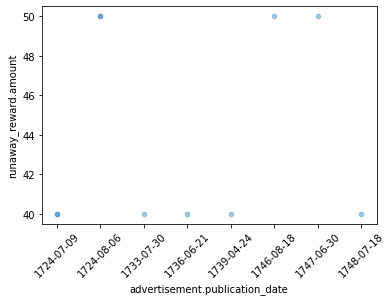

In [237]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/17.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# test = # Insert Code Here


# # You can use df.plot() here.
#           # Insert Code Here
#            # Insert Code Here
#            # Insert Code Here
#           rot = 45,
#           alpha = 0.4)





test = fotm_visualization.loc[(fotm_visualization['year'] >=1704) & (fotm_visualization['year'] <= 1750) & (fotm_visualization['runaway_reward.amount'] > reward_median)]

test.plot(x = 'advertisement.publication_date',
          y='runaway_reward.amount',
          kind = 'scatter',
          rot = 45,
          alpha = 0.4)

### Q18 - Visualizing `runaway_reward.amount` vs. `advertisement.publication_date` (1751 to 1800)

Repeat the steps from Q17 but change the year interval to between `1751` and `1800`. You might have to adjust the figure size to get a clearer plot.

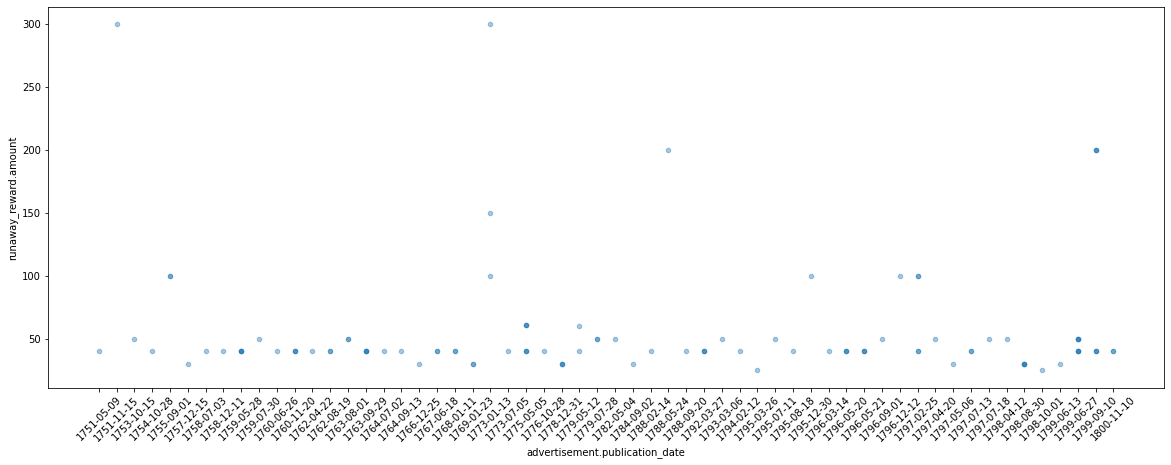

In [249]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/18.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# Insert Code Here

# Insert Code Here
    # Insert Code Here
    # Insert Code Here
    # Insert Code Here
    # Insert Code Here


test = fotm_visualization.loc[(fotm_visualization['year'] >=1751) & (fotm_visualization['year'] <= 1800) & (fotm_visualization['runaway_reward.amount'] > reward_median)]

test.plot(x = 'advertisement.publication_date',
          y='runaway_reward.amount',
          kind = 'scatter',
          rot = 45,
          alpha = 0.4,
          figsize=(20,7))

## Visualization using Seaborn 


 

### Q19 - Visualizing complete and incomplete advertisements between 1704 and 1750

In this question, we will display a histogram chart of the `advertisement.complete` being `True` or `False`. 

- You can use the seaborn function `sns.catplot` and the parameter `kind` as `count`. But first you will make a dataframe
- We will filter out a dataframe where `year` is between 1704 and 1750 and store it as `temp` and the visualize it.


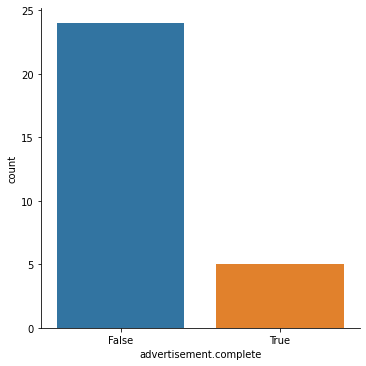

In [250]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/19.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# temp = # Insert Code Here for new data frame

# # Insert Code for plot here
#     # Insert Code Here
#     # Insert Code Here


temp = fotm_visualization.loc[(fotm_visualization['year'] >=1704) & (fotm_visualization['year'] <= 1750)]

sns.catplot(x = 'advertisement.complete',
            data = temp,
            kind = 'count')

### Q20 - Visualizing complete and incomplete advertisements between 1751 and 1800

Repeat the steps you followed in the previous question with the interval from `1751` to `1800`

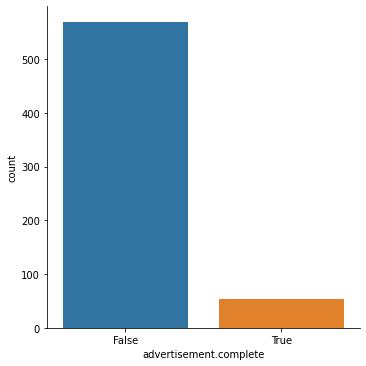

In [251]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/20.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# temp = # Insert Code Here for new data frame

# # Insert Code for plot here
#     # Insert Code Here
#     # Insert Code Here


temp = fotm_visualization.loc[(fotm_visualization['year'] >=1751) & (fotm_visualization['year'] <= 1800)]
sns.catplot(
         x = 'advertisement.complete',
        data = temp,
        kind = 'count')


### Q21 - Visualizing complete and incomplete advertisements between 1801 and 1850

Repeat the steps you followed in Q19 with the new date interval.

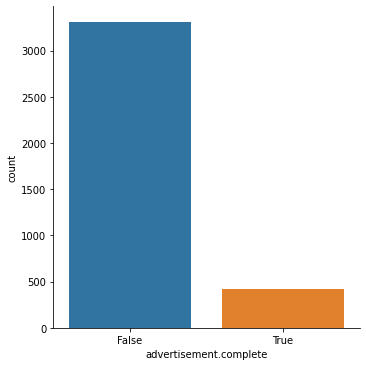

In [252]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/21.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


# temp = # Insert Code Here for new data frame

# # Insert Code for plot here
#     # Insert Code Here
#     # Insert Code Here

temp = fotm_visualization.loc[(fotm_visualization['year'] >=1801) & (fotm_visualization['year'] <= 1850)]
sns.catplot(
         x = 'advertisement.complete',
        data = temp,
        kind = 'count')


**Extra**:You can try out an visualize the remaining years (`1851` to `1874`) here using the code you wrote above.

### Q22 - Visualizing `runaway_reward.amount` vs. `newspaper_location.state`

In this question,
- Display a **categorical** plot of the state of newspaper location and see how reward amounts differed by enslaver type in each state. 
- We also want to check the number of advertisments that were completed vs the ones that were incomplete. To do this we will add another paramter `hue`.

**Note**: Two things that you might notice in the code block below is `x =` and `x.set_xticklabels(rotation=45)`. Normally (like `df.plot`) we would use rot inside the function to rotate the labels. That is not the case with `seaborn` and we have to follow a specific method to modify our plots for things such as `figure size` and `tick rotations` etc.
- In the following questions you might see these frequently so remember this note (you won't have to write these yourself).

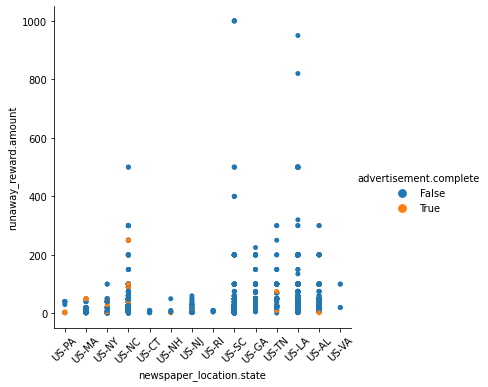

In [258]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/22.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


# x = sns.# Insert Code Here
#         # Insert Code Here
#         # Insert Code Here
#         # Insert Code Here
#         jitter = False)

# x.set_xticklabels(rotation=45)



x = sns.catplot(y = 'runaway_reward.amount',
         x = 'newspaper_location.state',
         hue = 'advertisement.complete',
        data = fotm_visualization,
        jitter = False)

x.set_xticklabels(rotation=45)

### Q23 - Visualizing runaway reward amount vs. newspaper location state II

In this question change the third parameter of the plot above to `enslaver.type`. 

*This time we have used `x.fig.` to modify the size of our plot.*

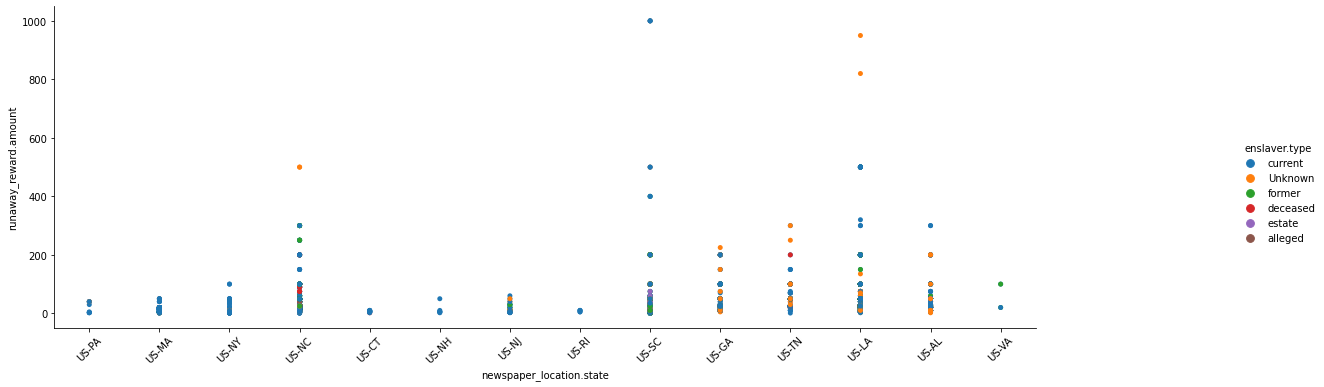

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/23.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# # x = # Insert Code Here
# #     # Insert Code Here
# #     # Insert Code Here
# #     # Insert Code Here
# #         jitter = False)

# x.set_xticklabels(rotation=45)
# x.fig.set_figwidth(20)
# x.fig.set_figheight(5)


x = sns.catplot(y = 'runaway_reward.amount',
         x = 'newspaper_location.state',
         hue = 'enslaver.type',
        data = fotm_visualization,
        jitter = False)

x.set_xticklabels(rotation=45)
x.fig.set_figwidth(20)
x.fig.set_figheight(5)

### Q24 - Visualizing `runaway_reward.amount` vs. `newspaper_location.state` 

In this question, we will display a **categorical** plot of the newspaper location state and the reward amount they published. We will see how reward amounts differed in each state using a **box** plot. We will also keep our third parameter **hue** as advertisments complete.

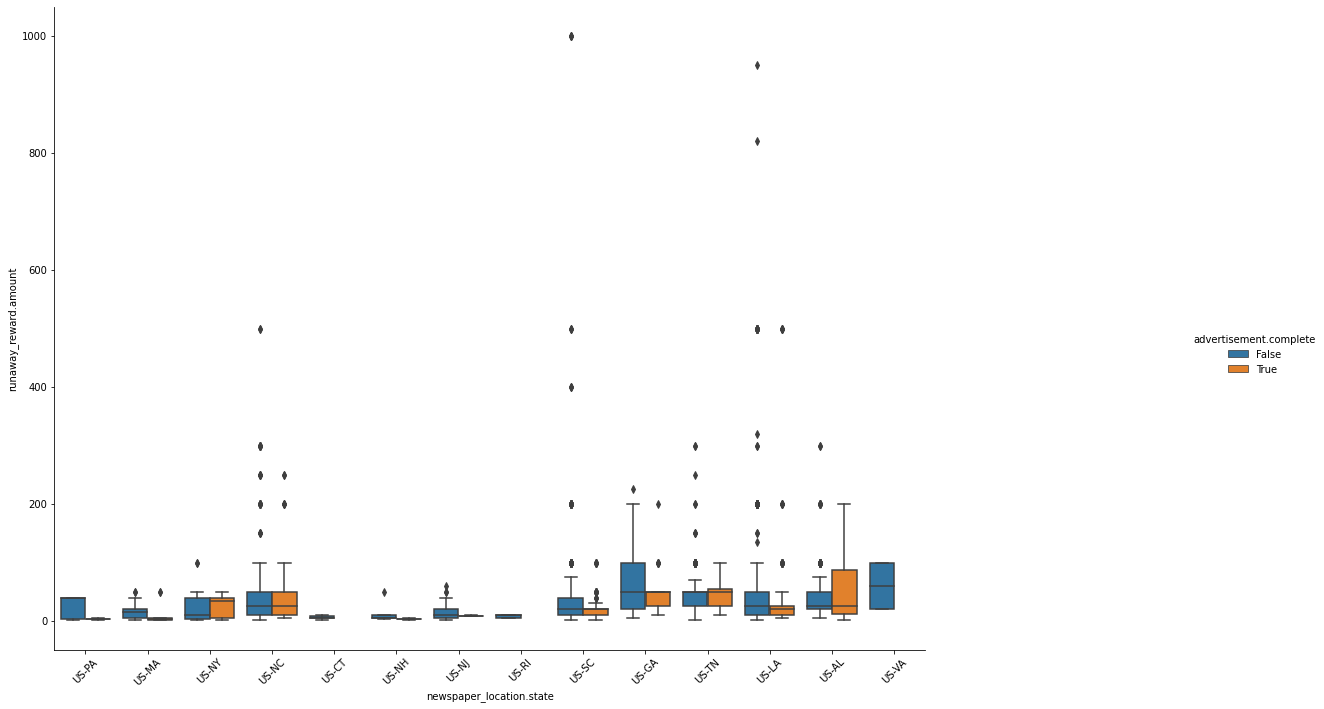

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/24.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# x = # Insert Code Here
#          # Insert Code Here
#          # Insert Code Here
#         # Insert Code Here
#         # Insert Code Here

# x.set_xticklabels(rotation=45)
# x.fig.set_figwidth(20)
# x.fig.set_figheight(10)


x = sns.catplot(y = 'runaway_reward.amount',
         x = 'newspaper_location.state',
         hue = 'advertisement.complete',
        data = fotm_visualization,
        kind = 'box')

x.set_xticklabels(rotation=45)
x.fig.set_figwidth(20)
x.fig.set_figheight(10)


As a Bonus replicate the code above and add another paramter to it `showfliers = False`

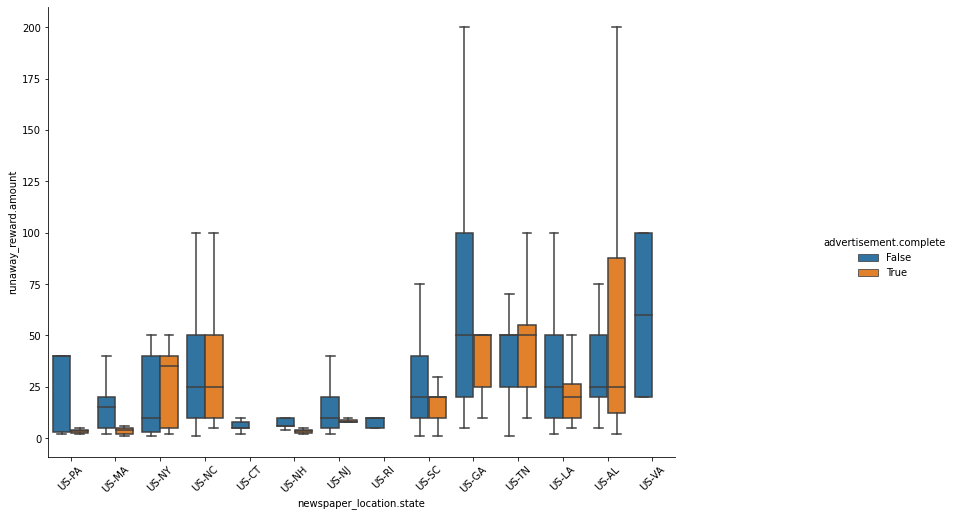

In [ ]:

# Insert Code Here

x = sns.catplot(y = 'runaway_reward.amount',
         x = 'newspaper_location.state',
         hue = 'advertisement.complete',
        data = fotm_visualization,
        kind = 'box',
        showfliers = False)

x.set_xticklabels(rotation=45)
x.fig.set_figwidth(14)
x.fig.set_figheight(7)

As you can see above `showfliers = False` removed the outliers, therefore giving us a better outlook on the graph.

### Q24 - Exploring A Newspaper 

Let's select a newspaper `The Daily Picayune` and save the dataframe as `The_Daily_P_Df`.

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/24.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

The_Daily_P_Df = fotm_visualization.loc[fotm_visualization['newspaper.name'] == 'The Daily Picayune']

### Q25 - Visualizing runaway reward amount vs. enslaver type

In this question, we will use a **relational** plot to plot:
- The `year` vs the `enslaver.type`.
- Will add a **Third** paramter `advertisment.complete` 
- We will also add a **Fourth** parameter `size` and equate it to `runaway_reward.amount`
- There's another paramter which defined the size (radius) of the 4th parameter called `sizes` that we have declared as a tuple `(20,200)`.
-  We will see how reward amounts differed by enslaver type in `The_Daily_P_Df`.


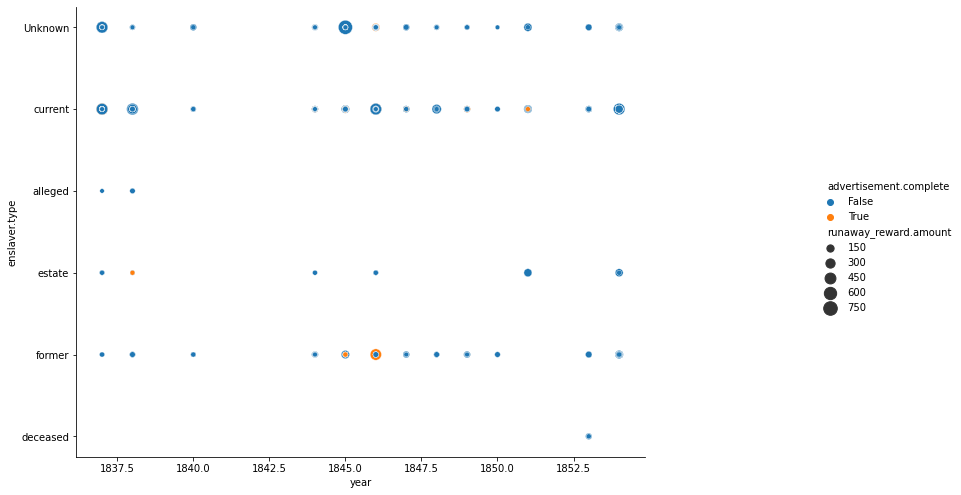

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/25.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# x = # Insert Code Here
#         # Insert Code Here
#         # Insert Code Here
#         # Insert Code Here
#         # Insert Code Here
#          sizes = (20,200))

# x.fig.set_figwidth(15)
# x.fig.set_figheight(7)


x = sns.relplot(x = 'year',
        y = 'enslaver.type',
        hue = 'advertisement.complete',
        size = 'runaway_reward.amount'
        data = The_Daily_P_Df,
         sizes = (20,200))

x.fig.set_figwidth(15)
x.fig.set_figheight(7)

### Q26 - Looking at a State (year vs newspaper names)

Let's select `US-LA` and save the dataframe as `Lousiana_df`.

We will use a categorical plot on `year` and see what newspapers were used for advertisement each year.

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/26.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# Insert Filtered Dataframe code here

# x = # Insert Code Here
#         # Insert Code Here
#         # Insert Code Here

# x.fig.set_figwidth(20)
# x.fig.set_figheight(5)


Lousiana_df = fotm_visualization.loc[fotm_visualization['newspaper_location.state'] == 'US-LA']

x = sns.catplot(y = 'newspaper.name',
        x = 'year',
        data = Lousiana_df)

x.fig.set_figwidth(20)
x.fig.set_figheight(5)

### Q27 - Looking the state with the **Second** highest # of Advertisments
Filter out the second highest state and save it as a new dataframe, we will use a categorical plot on `year` and see what newspapers were used for advertisement each year in the respective state. Also, add a **Third** parameter `advertisment.complete`.

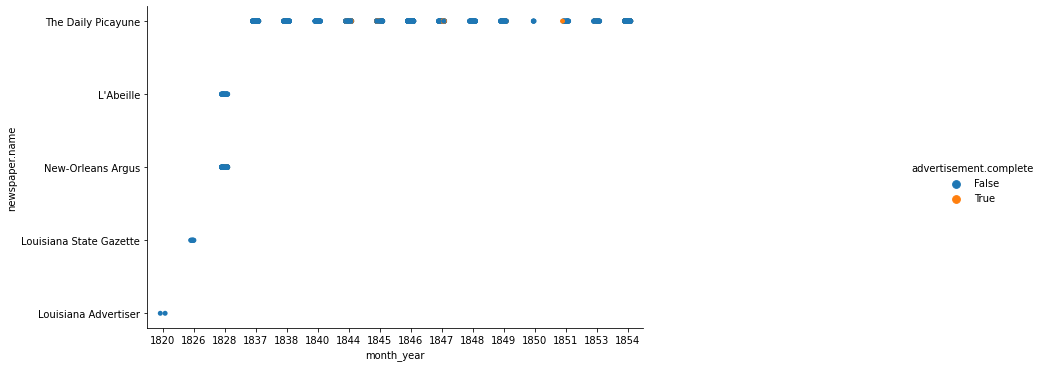

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/27.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# # Insert Filtered Dataframe code here

# x = # Insert Code Here
#         # Insert Code Here
#         # Insert Code Here
#         # Insert Code Here

# x.fig.set_figwidth(20)
# x.fig.set_figheight(5)



temp_df = fotm_visualization.loc[fotm_visualization['newspaper_location.state'] == 'US-NC']

x = sns.catplot(y = 'newspaper.name',
        x = 'year',
        hue = 'advertisement.complete',
        data = temp_df)

x.fig.set_figwidth(20)
x.fig.set_figheight(5)

### Q28a - Looking at a year with the most advertisements I

Let's find out a year with the most advertisements. Use the method implemented in questions 11 through 15.

In [259]:
# Using methods implemented in 

fotm_visualization['year'].value_counts().head(1)

1854    527
Name: year, dtype: int64

Make a new dataframe and name it `df_YEAR`. Where the `YEAR` is the year with the most advertisments.
- You can make the dataframe by using `.loc` like previous questions.
- We will use a **relational** plot on `newspaper_location.state` vs. `runaway_reward.amount`.

**Note**: This number won' be the same if you check the year with the highest number of advertisments at the start of this practicum. This is because halfway through we removed values lower than `1` and higher than `2000` from the `runaway_award.amount` column.

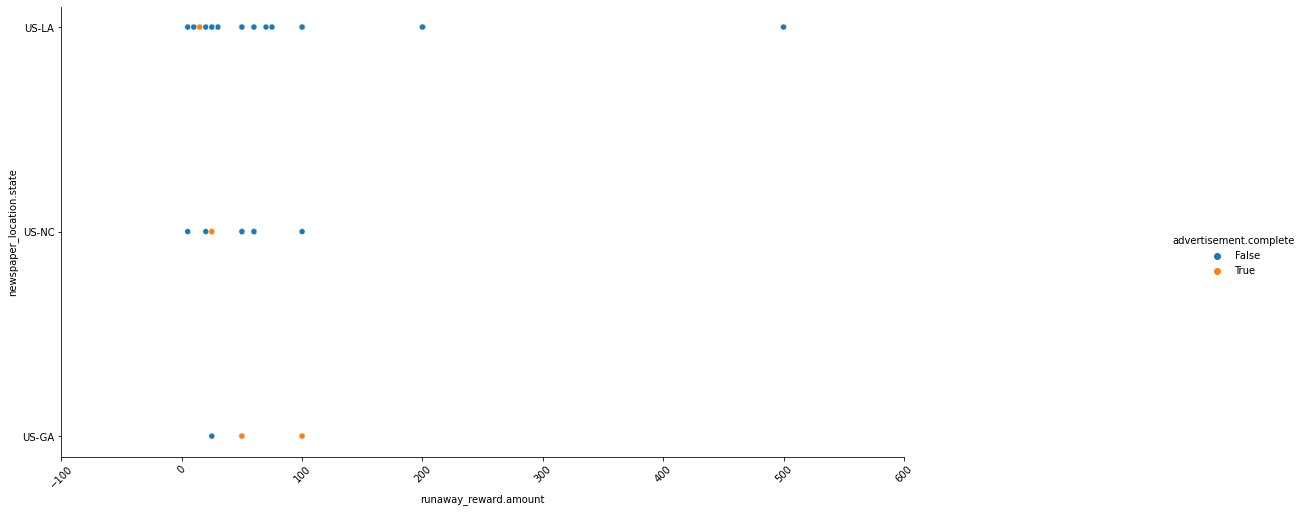

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/28.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.

# # Insert Filtered Dataframe code here

# x = # Insert Code Here
#         # Insert Code Here
#         # Insert Code Here
#         # Insert Code Here

x.set_xticklabels(rotation=45)
x.fig.set_figwidth(20)
x.fig.set_figheight(7)



df_1854 = fotm_visualization.loc[fotm_visualization['year'] == 1854]

x = sns.relplot(y = 'newspaper_location.state',
                x = 'runaway_reward.amount',
                hue = 'advertisement.complete',
                data = df_1854)

x.set_xticklabels(rotation=45)
x.fig.set_figwidth(20)
x.fig.set_figheight(7)

### Q28b - Looking at a year with the most advertisements II

We will use a **categorical** plot and display how `newspaper_location.city` was different per newspaper and the where the most completed advertisments were. in the respective year. also to avoid overlapping of points, use `kind`= `"swarm"`.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 99.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


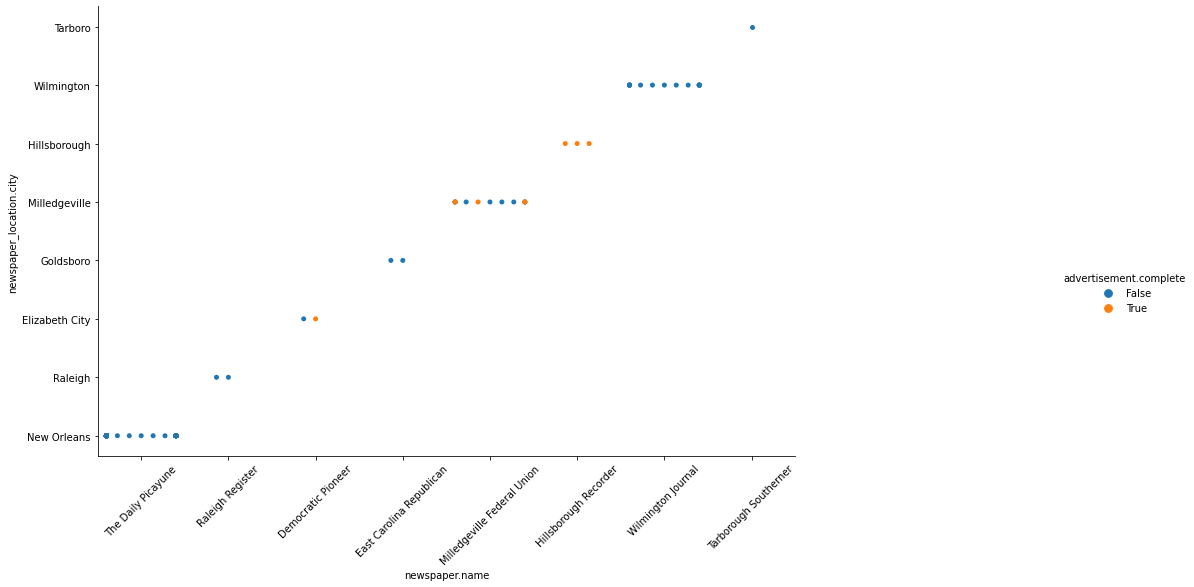

In [262]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/28.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


# x = # Insert Code Here
#            # Insert Code Here
#            # Insert Code Here
#            # Insert Code Here
#            # Insert Code Here

x.set_xticklabels(rotation=45)
x.fig.set_figwidth(20)
x.fig.set_figheight(7)


x = sns.catplot(y = 'newspaper_location.city',
            x ='newspaper.name',
            hue = 'advertisement.complete',
            data = df_1854,
            kind = 'swarm')

x.set_xticklabels(rotation=45)
x.fig.set_figwidth(20)
x.fig.set_figheight(7)

# Conclusion

For this you will write a summary of what steps you followed throughout this notebook, why they were important and your findings.
For example:
- 
- 
- 
- 
- 
- 


You can also add your answers to the questions posted throughout the notebook here. 



# Submission
Run this code block to download your answers.

In [ ]:
from google.colab import files
!zip -r "{student_id}.zip" "{student_id}"
files.download(f"{student_id}.zip")